# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_excel('geo_comment.xlsx')

In [3]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
data.head()

,x,y,comment_class,multiplier,comment
0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...


- визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

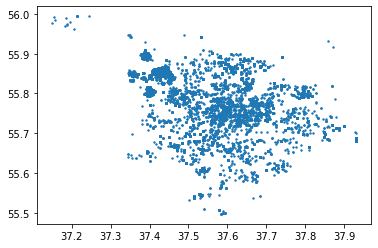

In [6]:
plt.scatter(data['x'], data['y'], s=2)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
data_scaled = scaler.fit_transform(data[['x', 'y']])

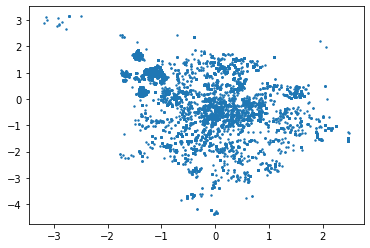

In [21]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], s=2)

In [13]:
kmeans_alg = KMeans(n_clusters=3)

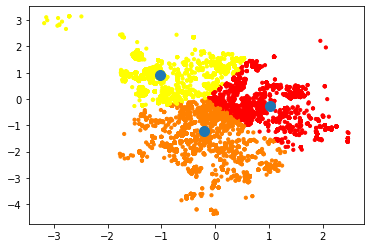

In [40]:
clusters = kmeans_alg.fit_predict(data_scaled)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='autumn', s=10)

centers = kmeans_alg.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=100)

In [61]:
def get_descr(algo_name, y, y_pred, X):
    return "{}\nARI {:.2f}\nSilhouette {:.2f}".format(
        algo_name,
        adjusted_rand_score(y, y_pred),
        silhouette_score(X, y_pred)
    )

Text(0.5, 1.0, 'KMeans\nARI -0.07\nSilhouette 0.54')

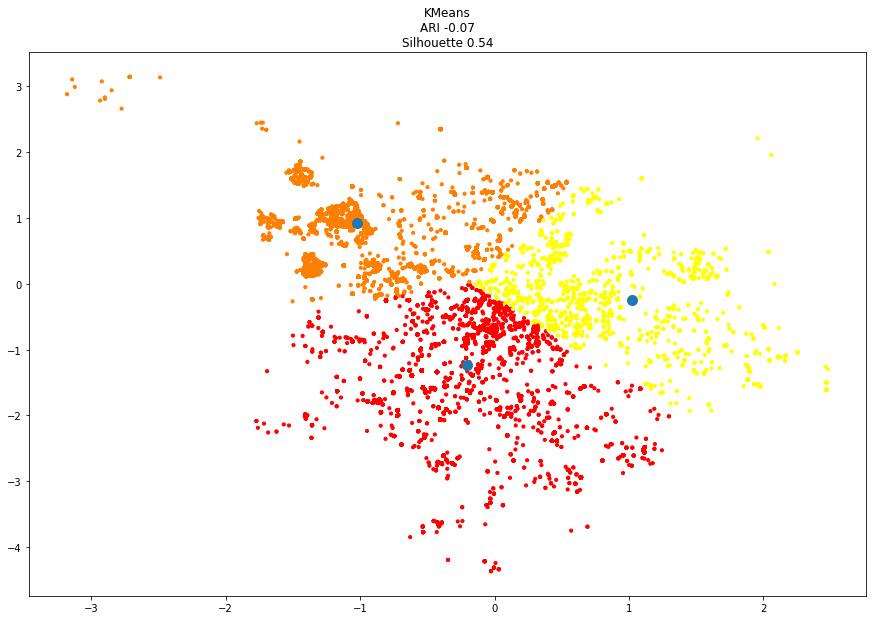

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

clusters = kmeans_alg.fit_predict(data_scaled)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='autumn', s=10)

centers = kmeans_alg.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=100)

ax.set_title(get_descr(kmeans_alg.__class__.__name__, data['comment_class'], clusters, data_scaled))

In [15]:
dbscan_alg = DBSCAN()

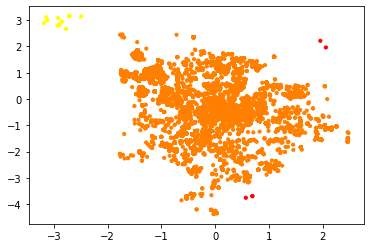

In [16]:
clusters = dbscan_alg.fit_predict(data_scaled)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='autumn', s=10)

In [ ]:
# По каким-то причинам запуск алгоритмов AffinityPropagation() и AgglomerativeClustering() ведет "убивает" ядро
# и разделение на кластера не производится. Просьба подсказать причины этого.

- аналогично исследовать скопления голосов за и против отдельно

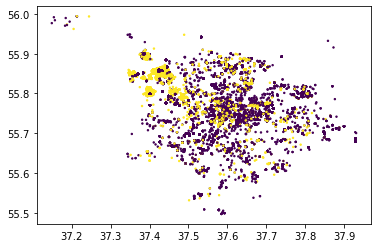

In [17]:
plt.scatter(data['x'], data['y'],c=data['comment_class'], s=2)

In [27]:
data_for = data.loc[data['comment_class'] == 1]
data_against = data.loc[data['comment_class'] == -1]

In [28]:
data_for_scaled = scaler.fit_transform(data_for[['x', 'y']])
data_against_scaled = scaler.fit_transform(data_against[['x', 'y']])

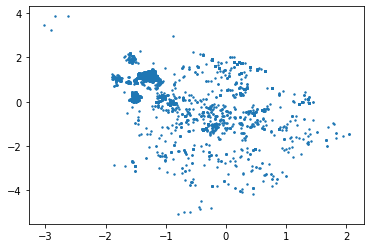

In [29]:
plt.scatter(data_for_scaled[:, 0], data_for_scaled[:, 1], s=2)

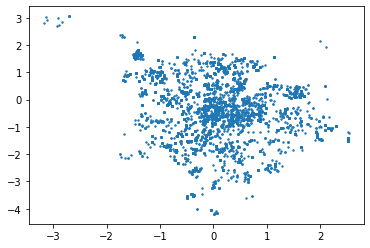

In [30]:
plt.scatter(data_against_scaled[:, 0], data_against_scaled[:, 1], s=2)

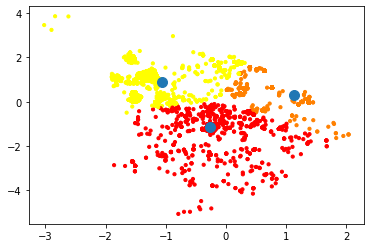

In [38]:
clusters_1 = kmeans_alg.fit_predict(data_for_scaled)
plt.scatter(data_for_scaled[:, 0], data_for_scaled[:, 1], c=clusters_1, cmap='autumn', s=10)

centers_1 = kmeans_alg.cluster_centers_
plt.scatter(centers_1[:, 0], centers_1[:, 1], s=100)

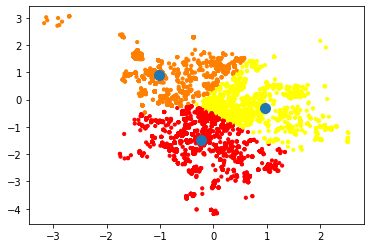

In [39]:
clusters_2 = kmeans_alg.fit_predict(data_against_scaled)
plt.scatter(data_against_scaled[:, 0], data_against_scaled[:, 1], c=clusters_2, cmap='autumn', s=10)

centers_2 = kmeans_alg.cluster_centers_
plt.scatter(centers_2[:, 0], centers_2[:, 1], s=100)

- подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)

In [48]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data_scaled, )
    k_inertia.append(clf_kmeans.inertia_)

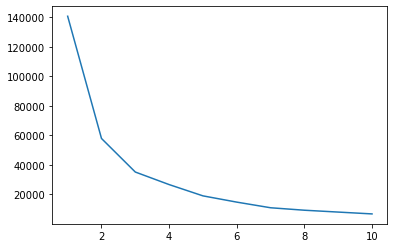

In [49]:
plt.plot(ks, k_inertia)

In [50]:
diff = np.diff(k_inertia)

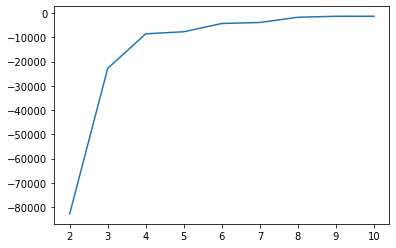

In [51]:
plt.plot(ks[1:], diff)

In [ ]:
# Оптимальное количество = 3